# HADES

Notebook to test out ideas and viz the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig

import hades
from hades import utils
from hades import pipeline

In [2]:
sample_rate = 1000 # Hz

def get_time_slice(start, duartion, sample_rate):
    time_slice = np.arange(0, int(duartion * sample_rate)) + int(start * sample_rate)
    return time_slice

In [3]:
# silly_pipeline = pipeline.SillyPipeline(fs=sample_rate)
# hades.pipeline.run_pipeline(silly_pipeline, "./data", "./preds");

In [4]:
# naive_linear_pipeline = pipeline.naive_pipelines.Linear(fs=sample_rate)
# hades.pipeline.run_pipeline(naive_linear_pipeline, "./data", "./preds", filter_data=(0.1, 100));

In [5]:
# naive_svm_pipeline = pipeline.naive_pipelines.SVM("./data", fs=sample_rate)
# hades.pipeline.run_pipeline(naive_svm_pipeline, "./preds");

In [6]:
# def dist(x1, x2):
#     return np.linalg.norm(x1 - x2)

# naive_lookup_pipeline = pipeline.naive_pipelines.Lookup(fs=sample_rate, distance_fn=dist, downsample_factor=25)
# hades.pipeline.run_pipeline(naive_lookup_pipeline, "./data", "./preds");

In [7]:
# downsampled_linear_pipeline = pipeline.naive_pipelines.DownsampledLinear(fs=sample_rate)
# hades.pipeline.run_pipeline(downsampled_linear_pipeline, "./data", "./preds");

In [9]:
part1_pipeline = pipeline.windowed_feature_pipelines.Part1(fs=sample_rate, window_length=100e-3, window_displacement=50e-3, history=3)
hades.pipeline.run_pipeline(part1_pipeline, "./data", "./preds");

 Subjects : 100%|██████████| 3/3 [00:09<00:00,  3.24s/it]


In [10]:
hades.pipeline.run_pipeline(part1_pipeline, "./data", "./preds", filter_data=(0.1, 100));

 Subjects : 100%|██████████| 3/3 [00:13<00:00,  4.38s/it]


In [11]:
train_data, train_label, test_data = utils.load_data("./data", 0)

In [12]:
time = np.linspace(0, len(train_data) / sample_rate, len(train_data))

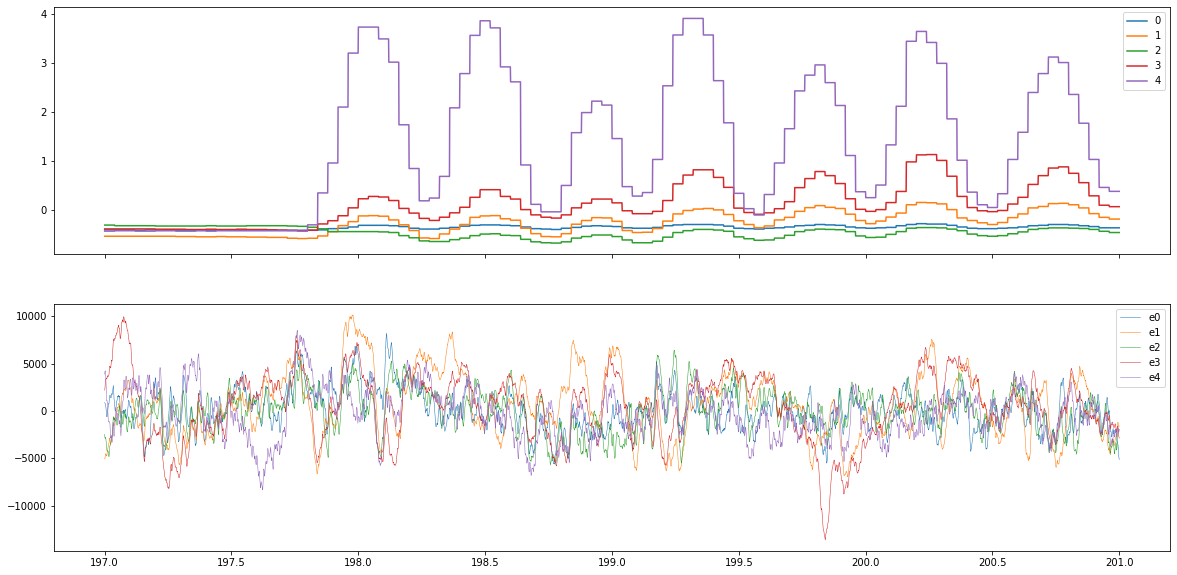

In [13]:
time_slice = get_time_slice(1+(4*49), 4, sample_rate=sample_rate)

fig = plt.figure(figsize=(20, 10))
axs0, axs1 = fig.subplots(nrows=2, sharex=True)

axs0.plot(time[time_slice], train_label[time_slice], label=["0", "1", "2", "3", "4"])
axs1.plot(time[time_slice], train_data[time_slice, 0:5], label=["e0", "e1", "e2", "e3", "e4"], linewidth=0.5)

axs0.legend()
axs1.legend()
plt.show()

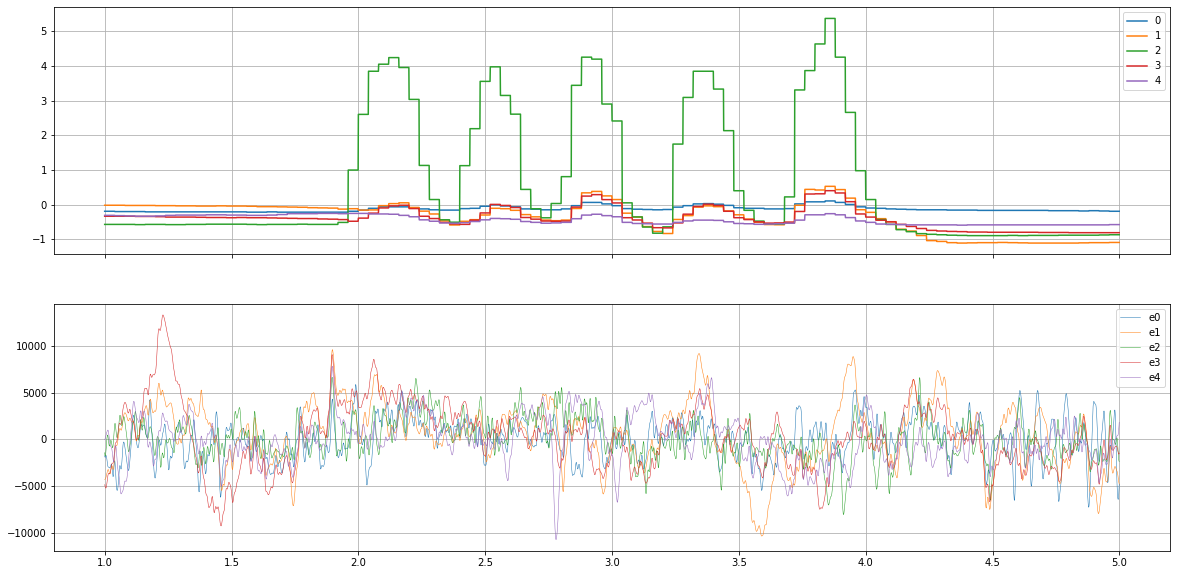

In [14]:
time_slice = get_time_slice((1+(4*0)), 4, sample_rate=sample_rate)

fig = plt.figure(figsize=(20, 10))
axs0, axs1 = fig.subplots(nrows=2, sharex=True)

axs0.plot(time[time_slice], train_label[time_slice], label=["0", "1", "2", "3", "4"])
axs1.plot(time[time_slice], hades.preprocessors.filter_data(train_data)[time_slice, 0:5], label=["e0", "e1", "e2", "e3", "e4"], linewidth=0.5)

axs0.grid(True)
axs1.grid(True)
axs0.legend()
axs1.legend()
plt.show()

In [15]:
linear_pipeline = pipeline.naive_pipelines.Linear(fs=sample_rate)#, downsample_factor=20)
train_data_filt = hades.preprocessors.filter_data(train_data, (0.1, 100))
label_clips = hades.preprocessors.get_label_clips(train_label)
linear_pipeline.fit(train_data_filt, train_label)
preds_label = linear_pipeline.predict(train_data)
preds_label = hades.postprocessors.clip_predictions(preds_label, label_clips)

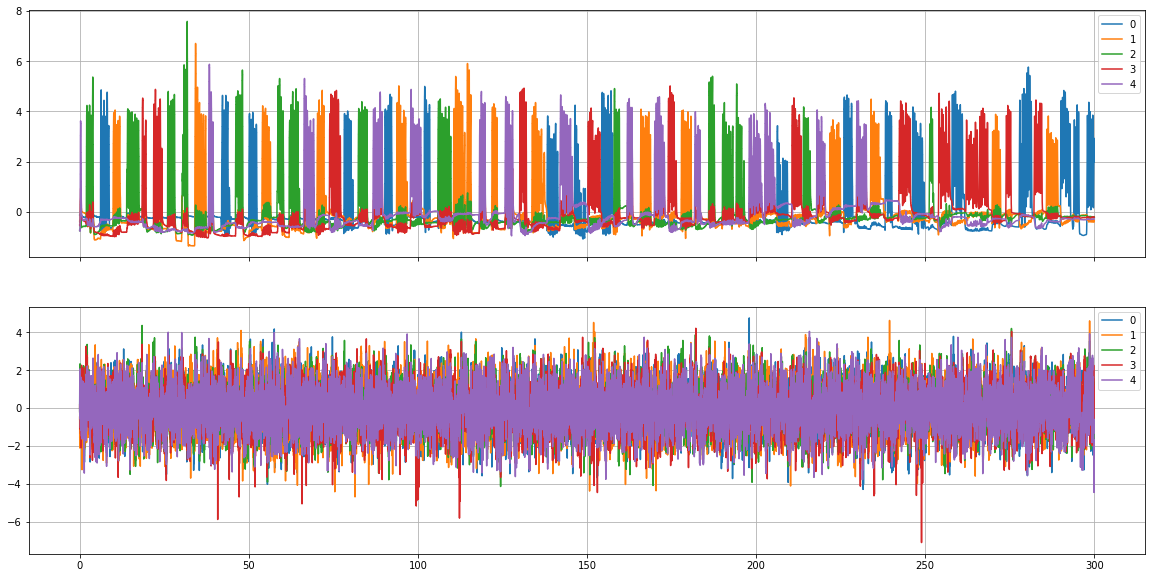

In [16]:
time_slice = get_time_slice((1+(4*0)), 4, sample_rate=sample_rate)

fig = plt.figure(figsize=(20, 10))
axs0, axs1 = fig.subplots(nrows=2, sharex=True)

axs0.plot(time, train_label, label=["0", "1", "2", "3", "4"])
axs1.plot(time, hades.preprocessors.normalize(train_data_filt)[0][:,[11, 16, 22, 49, 57]], label=["0", "1", "2", "3", "4"])

axs0.grid(True)
axs1.grid(True)
axs0.legend()
axs1.legend()
plt.show()

In [17]:
train_label0, train_label1, train_label2, train_label3, train_label4 = train_label.T

In [18]:
(train_label0[train_label0 < 0]).mean()

-0.3738056286131928

In [19]:
model = linear_pipeline.model.steps[1][1]
coefs = model.coef_
for fid, cfs in enumerate(coefs):
  cf = [(abs(cfs[i]), i) for i in range(len(cfs))]
  cf.sort(reverse=True, key=lambda x: x[0])
  print(f"For finger {fid}:")
  print([f"{i}: {v:.4f}, " for v, i in cf])
  print("\n\n")

For finger 0:
['49: 0.1032, ', '22: 0.0916, ', '52: 0.0774, ', '42: 0.0751, ', '56: 0.0674, ', '41: 0.0641, ', '0: 0.0615, ', '7: 0.0603, ', '28: 0.0602, ', '23: 0.0595, ', '20: 0.0487, ', '27: 0.0485, ', '19: 0.0444, ', '25: 0.0437, ', '34: 0.0425, ', '30: 0.0414, ', '33: 0.0361, ', '24: 0.0355, ', '31: 0.0337, ', '37: 0.0319, ', '45: 0.0317, ', '16: 0.0315, ', '26: 0.0315, ', '59: 0.0301, ', '15: 0.0276, ', '13: 0.0273, ', '11: 0.0272, ', '14: 0.0272, ', '61: 0.0266, ', '43: 0.0259, ', '55: 0.0242, ', '60: 0.0229, ', '36: 0.0225, ', '2: 0.0220, ', '5: 0.0214, ', '17: 0.0211, ', '1: 0.0202, ', '38: 0.0192, ', '44: 0.0177, ', '48: 0.0163, ', '50: 0.0157, ', '6: 0.0147, ', '21: 0.0127, ', '51: 0.0126, ', '9: 0.0114, ', '39: 0.0097, ', '18: 0.0097, ', '54: 0.0090, ', '46: 0.0084, ', '29: 0.0082, ', '35: 0.0079, ', '58: 0.0079, ', '47: 0.0074, ', '12: 0.0069, ', '3: 0.0051, ', '10: 0.0045, ', '4: 0.0036, ', '40: 0.0031, ', '32: 0.0027, ', '8: 0.0008, ', '57: 0.0003, ', '53: 0.0002, ']



